In [ ]:
!nvidia-smi
!python --version

/bin/bash: line 1: nvidia-smi: command not found
Python 3.11.11


## 1 Prepare environment
1.1. Import astronomical packages
+ `lightkurve` - [library](https://lightkurve.github.io/lightkurve/index.html) library for discovery Kepler and Tess datasets
+ `astropy` - [library](https://www.astropy.org/) designed for astronomy and astrophysics. It provides a comprehensive suite of tools for handling astronomical data, performing scientific computations, and supporting research workflows

In [45]:
import io

# astronomy packages
try:
  import lightkurve as lk
except:
  !pip install lightkurve --upgrade
  # ffmpeg animation library
  !apt-get install -y ffmpeg
  import lightkurve as lk

try:
  import astropy as ast
except:
  !pip install astropy --upgrade
  import astropy as ast

# math packages
import numpy as np
import pandas as pd

# visualization packages
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# Check versions
print('Lightkurve version: ' + lk.__version__)
print('Astropy version: ' + ast.__version__)
print('Numpy version: ' + np.__version__)
print('Matplotlib version: ' + matplotlib.__version__)
print('Pandas version: ' + pd.__version__)


Lightkurve version: 2.5.0
Astropy version: 7.0.0
Numpy version: 1.26.4
Matplotlib version: 3.10.0
Pandas version: 2.2.2


## 2 Define interested starts
Definied starts available from TESS Input Catalog (TIC) and append prefix TIC.

In [46]:
def append_prefix(df: pd.DataFrame,
                  prefix="TIC "):
  # Initialize an empty list
  list = []

  # Iterate through each number in the dataframe
  for num in df[0]:
      list.append(f"{prefix}{num}")

  # Convert to a NumPy array
  return np.array(list)

In [47]:
star_name = ["TIC 116986071"]
star_names_50_1_url = "https://raw.githubusercontent.com/serhiikartashov/discovery-astronomic-objects/refs/heads/main/data/tess_vstars_50_1.csv"
df = pd.read_csv(star_names_50_1_url, header=None)

# Convert to a NumPy array
star_names_50_1 = append_prefix(df)

# Print the final array
print(star_names_50_1)

['TIC 116986071' 'TIC 1551778142' 'TIC 159332859' 'TIC 187531837'
 'TIC 198183379' 'TIC 219100171' 'TIC 229510866' 'TIC 229704090'
 'TIC 229752721' 'TIC 229937189' 'TIC 230019644' 'TIC 230071306'
 'TIC 230083885' 'TIC 230381054' 'TIC 233745344' 'TIC 237116143'
 'TIC 237201691' 'TIC 237205536' 'TIC 237206223' 'TIC 237213653'
 'TIC 251105281' 'TIC 251333156' 'TIC 252452281' 'TIC 260694891'
 'TIC 263931812' 'TIC 275259749' 'TIC 281482721' 'TIC 288268074'
 'TIC 29221935' 'TIC 315756675' 'TIC 327756689' 'TIC 329351663'
 'TIC 341839700' 'TIC 341871585' 'TIC 351695758' 'TIC 353241568'
 'TIC 353257675' 'TIC 364184518' 'TIC 366873414' 'TIC 376869068'
 'TIC 388565206' 'TIC 392126428' 'TIC 392569693' 'TIC 429059113'
 'TIC 441765151' 'TIC 446041643' 'TIC 467835395' 'TIC 82243350'
 'TIC 85855399' 'TIC 94541786']


## 3 Collect datasets

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

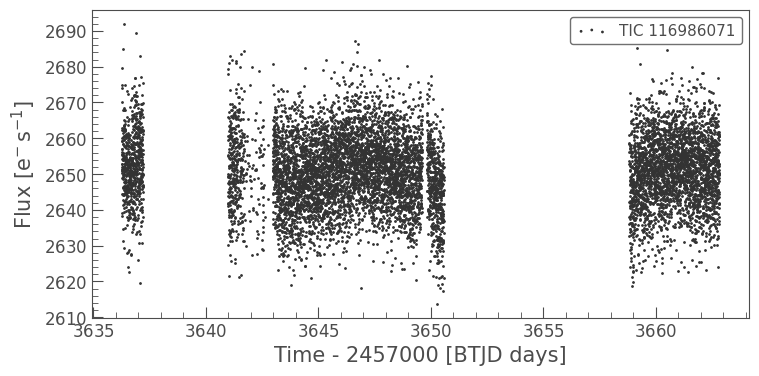

In [37]:
lc = lk.search_lightcurve(target=f"TIC 116986071", sector=86, mission="TESS").download();
lc.scatter();

In [48]:
pixelfile = lk.search_targetpixelfile("TIC 116986071", sector=86, mission="TESS").download();
pixelfile.animate()

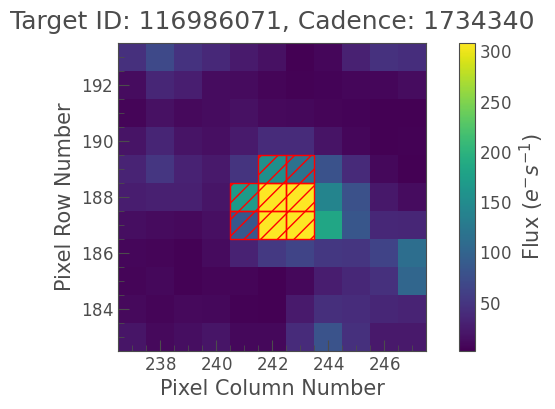

In [49]:
pixelfile = lk.search_targetpixelfile("TIC 116986071", sector=86, mission="TESS").download();
pixelfile.plot(aperture_mask="pipeline");

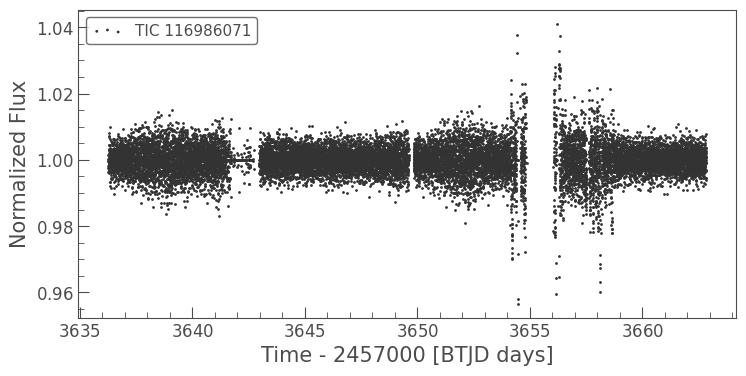

In [50]:
pixelfile = lk.search_targetpixelfile("TIC 116986071", sector=86, mission="TESS").download();
pixelfile.to_lightcurve(method="pld").remove_outliers().flatten().scatter();

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

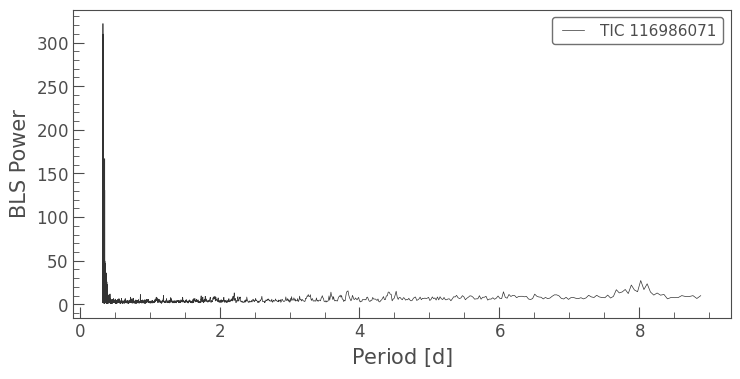

In [51]:
pixelfile = lk.search_targetpixelfile("TIC 116986071", sector=86, mission="TESS").download();
lc = pixelfile.to_lightcurve(method="pld").remove_outliers().flatten();
lc.to_periodogram("bls").plot()

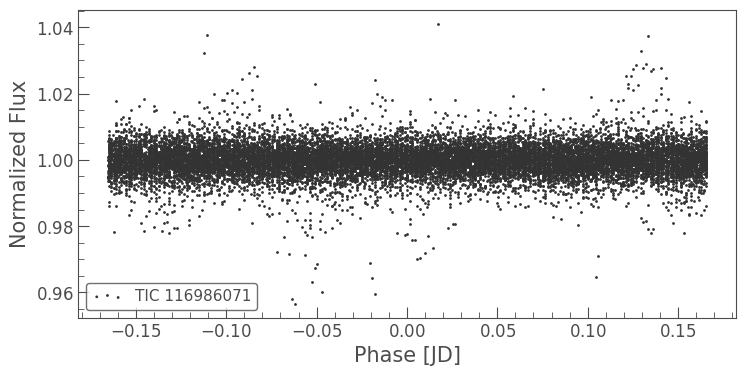

In [52]:
pixelfile = lk.search_targetpixelfile("TIC 116986071", sector=86, mission="TESS").download();
lc = pixelfile.to_lightcurve(method="pld").remove_outliers().flatten();
period = lc.to_periodogram("bls").period_at_max_power
lc.fold(period).scatter();

In [ ]:
pixelfile.to_lightcurve(method="pld").scatter();

In [ ]:
lc = pixelfile.to_lightcurve(method="pld").remove_outliers().flatten();
period = lc.to_periodogram("bls").period_at_max_power

<Figure size 1000x600 with 0 Axes>

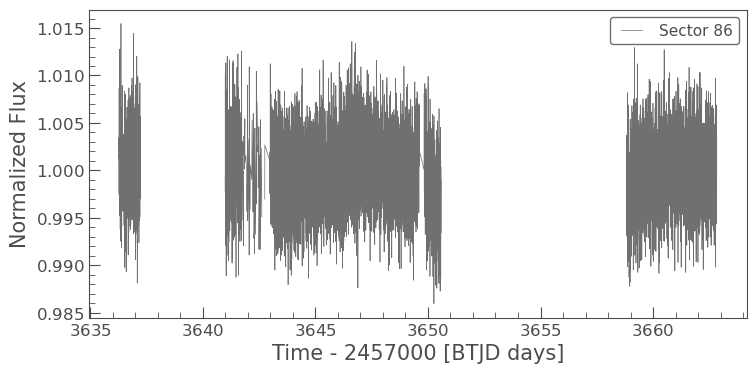

<Figure size 1000x600 with 0 Axes>

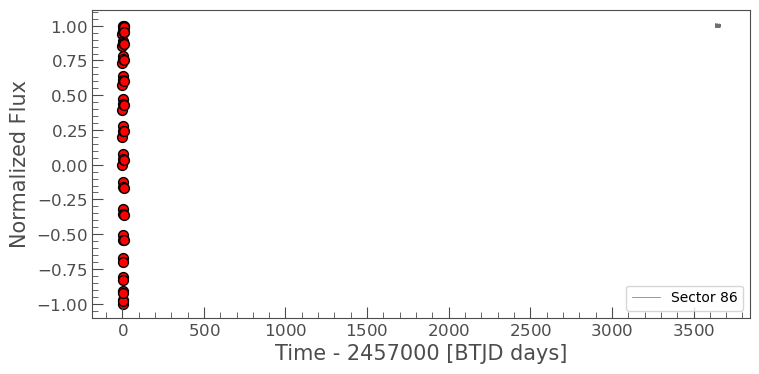

In [ ]:
# # Create a figure
# plt.figure(figsize=(10, 6))

# lc_collection = search_lightcurve("TIC 116986071", sector=86, mission="TESS").download_all();

# for lc in lc_collection:
#     (lc.normalize()).plot(label=f"Sector {lc.sector}", alpha=0.7)

# x = np.linspace(0, 10, 50)  # 50 points between 0 and 10
# y = np.sin(x)

# plt.scatter(x, y, s=50, c='red', marker='o', edgecolors='black')
# plt.legend()
# plt.show()